### Homework 3

**1.** For a constant $c$, show that $E[(s-c)^2] = (c-E[s])^2 + \text{Var}[s]$. (2 points)

We know the $\text{Var}[s]$. 
$$
\begin{align}
\text{Var}[s] &= E[s^2] - E[s]^2 \\
\end{align} 
$$
$$
\begin{align}
E[(s-c)^2] &= E[s^2 -  2sc + c^2 + E[s]^2 - E[s]^2] \\
&= (E[s^2] - E[s]^2) + E[E[s]^2 - 2sc + c^2] \\
&= \text{Var}[s] + E[s]^2  - 2cE[s] + c^2 \\
&= \text{Var}[s] + (c - E[s])^2 
\end{align}
$$

**2.** Let $X \sim Poisson(\lambda)$.

**(a)**
Plot in Python the probability mass function (p.m.f.) of X for λ = 1; 5; 10; 50. What do you observe
about the shape of the p.m.f. as λ grows?
*(1 point)*

*Answer:* We know that for Poisson distribution that $E[X] = \lambda$ and $Var[X] = \lambda$ or $\sigma_X = \sqrt{\lambda}$.

 As $\lambda$ grows we note that distribution looks more normal with the mean shifting towards $\lambda$ and standard deviation growing wider.

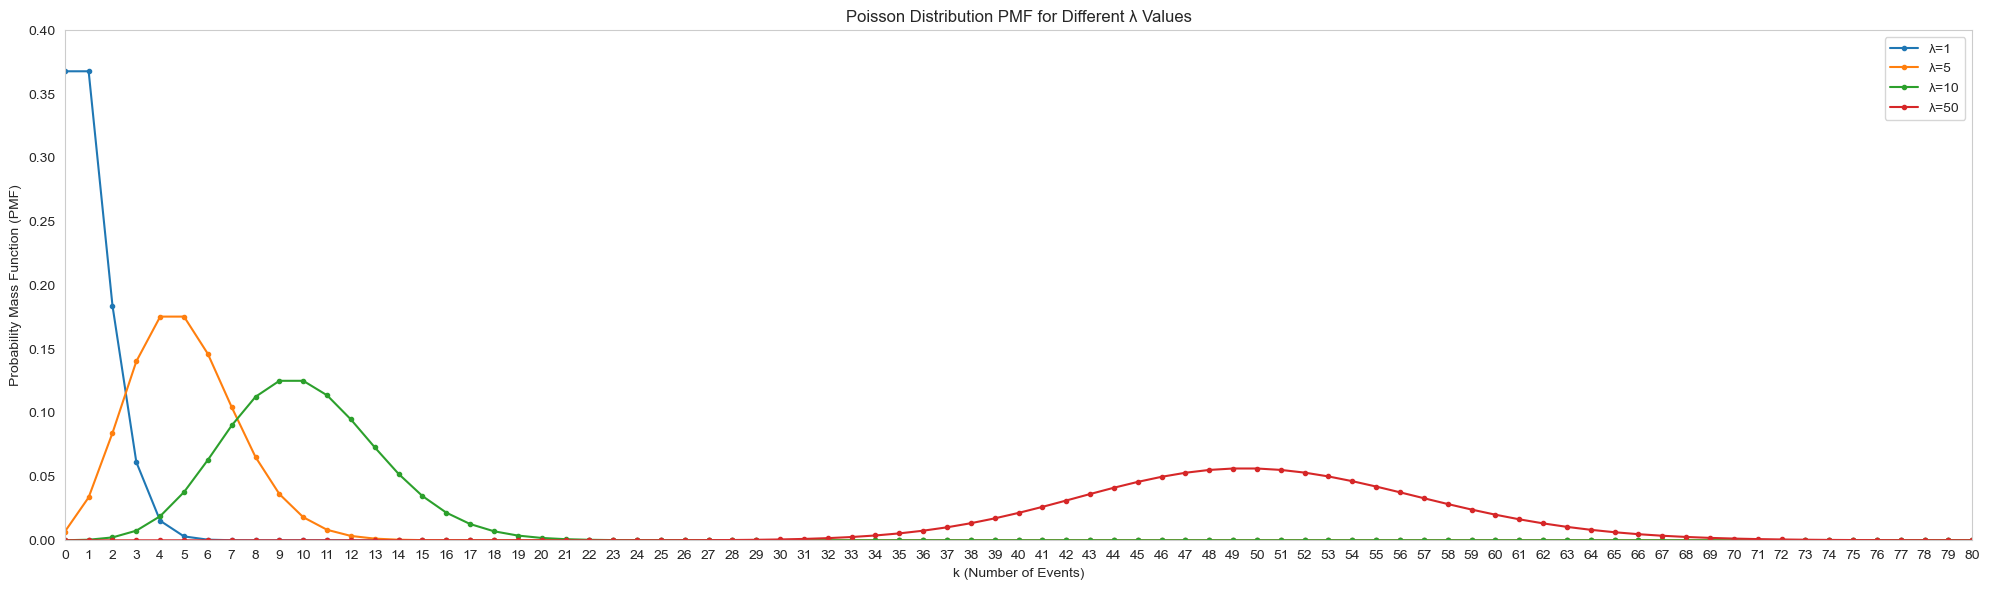

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import scipy
import seaborn as sns

sns.set_style('whitegrid')

np.random.seed(42)

_lambdas = [1, 5, 10, 50]

k_max = 80 #int(_lambdas[-1] + 4 * np.sqrt(_lambdas[-1]))
k_values = np.arange(0, k_max + 1)
plt.figure(figsize=(20, 6))
plt.title('Poisson Distribution PMF for Different λ Values')
# Create PMF for x as \lambda grows: 
for lam in _lambdas:
    pmf = poisson.pmf(k_values, lam)
    plt.plot(k_values, pmf, label=f'λ={lam}', marker='o', markersize=3, linestyle='-')
plt.xlabel('k (Number of Events)')
plt.ylabel('Probability Mass Function (PMF)')
plt.xticks(k_values)
plt.xlim(0, k_max) 
plt.ylim(0, 0.4)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('poisson_pmf.png', dpi=300)
plt.show()

**(b)**
What are the parameters of the best matching Normal distribution for
a given Poisson distribution with parameter λ? No formal derivation is required here, use your intuition and verify by plotting (for the same values of
λ as above).
(1 point)

*Answer:*

The parameters of the Normal distribution which best match the Poisson distribution are $\mu = \lambda$ and $\sigma^2 = \lambda$. These make sense as a closely matching normal will share the mean and variance of the poisson distribution.

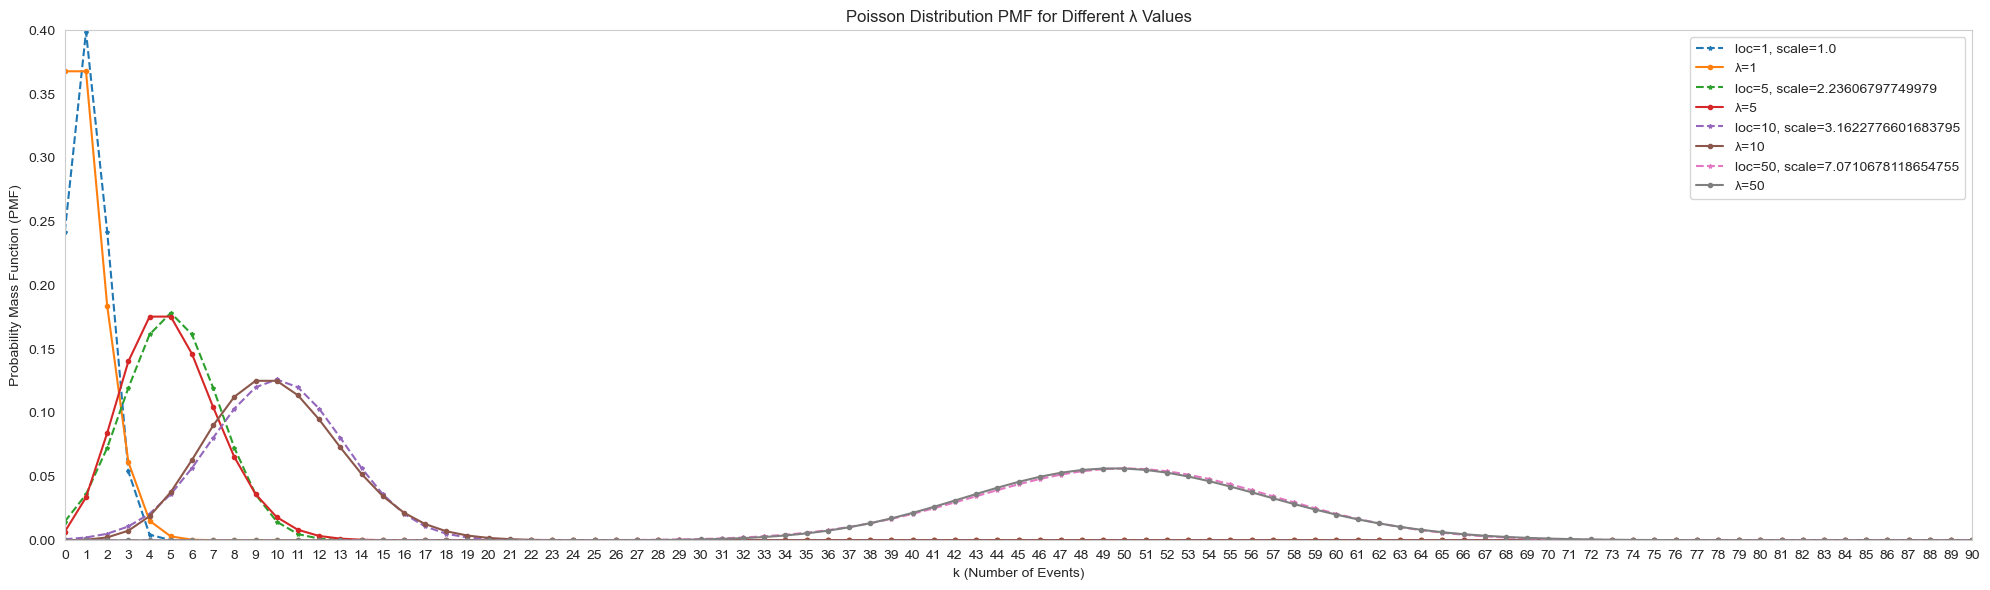

In [2]:
# What are the parameters of the best matching Normal distribution for
# a given Poisson distribution with parameter λ? No formal derivation is required here, use your intuition and verify by plotting (for the same values of
# λ as above).
# (1 point)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import norm

_lambdas = [1, 5, 10, 50]

k_max = 90 
k_values = np.arange(0, k_max + 1)
plt.figure(figsize=(20, 6))
plt.title('Poisson Distribution PMF for Different λ Values')
# Create PMF for x as \lambda grows: 
for lam in _lambdas:
    pmf = poisson.pmf(k_values, lam)
    bin_width = k_values[1] - k_values[0] # 1 
    normal_pmf = norm.pdf(k_values, loc=lam, scale=np.sqrt(lam)) * bin_width
    plt.plot(k_values, normal_pmf, label=f'loc={lam}, scale={np.sqrt(lam)}', marker='*', markersize=3, linestyle='--')
    plt.plot(k_values, pmf, label=f'λ={lam}', marker='o', markersize=3, linestyle='-')
plt.xlabel('k (Number of Events)')
plt.ylabel('Probability Mass Function (PMF)')
plt.xticks(k_values)
plt.xlim(0, k_max) 
plt.ylim(0, 0.4)
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('poisson_pmf.png', dpi=300)
plt.show()

**3. Noise models**

Assume a tuning curve $f(s)$ with stimulus angle $s \in [-\pi, \pi]$:
$$f(s) = \begin{cases}
    - f_{max} \tfrac4{\pi^2} (s-\tfrac\pi2) (s + \tfrac\pi2) &\quad s \in [-\tfrac\pi2, \tfrac\pi2]\\
    0 &\quad else
\end{cases} $$
In each subtask the firing rate $r$ is given by a different noise model. For a discreticed interval (50 bins) for $s$ into, draw 10 samples from $p(r|f(s))$. Do this for different $f_{max} = 1; 10; 100$, and plot the rates, their mean $\pm$ sem (standard error of the mean), and the analytical function.
(1.5 points for each subtask)

**(a)** Additive normal noise
$$p(r|f(s)) \sim N(\mu, \sigma^2)$$
with $\mu=f(s)$, $\sigma=1$.

**(b)** Multiplicative normal noise
$$p(r|f(s)) \sim N(\mu, \sigma^2)$$
with $\mu=f(s)$, $\sigma=f(s)$.

**(c)** Poisson noise
$$p(r|f(s)=\frac{f(s)^r}{r!} e^{-f(s)}$$

**(d)** Negative Binomial
$$p(r|q,p)= {{r+q-1}\choose{r}} (1-p)^q p^r$$
with $p=\frac{f(s)}{f(s)+q}$, $q=f(s)$.
Be careful about the case when $p = 0$.

**(e)** Based on your results, briefly discuss how realistic each of these models is. (1 point)

In [3]:
def tuning_function(s, f_max):
    if s >= -np.pi/2 and s <= np.pi/2:
        return -f_max * (4/(np.pi**2))   * (s - np.pi/2)*(s + np.pi/2)
    else:
        return 0

def evaluate_tuning_function(grid_points, f_max):
    """
    Vectorized evaluation of tuning function.
    """
    s = np.zeros_like(grid_points)
    # mask out all that lie outside range.
    zero_mask = np.abs(grid_points) > np.pi/2
    s[~zero_mask] = -f_max * (4/(np.pi**2)) *  (grid_points[~zero_mask]**2  - (np.pi/2)**2)
    return s

n_points=100
n_samples=10

grid_points = np.linspace(-np.pi, np.pi, n_points)
vec_ans = evaluate_tuning_function(grid_points, f_max=10)
ans = np.array([tuning_function(s, f_max=10) for s in grid_points])
assert vec_ans.shape == ans.shape
assert np.allclose(vec_ans, ans)

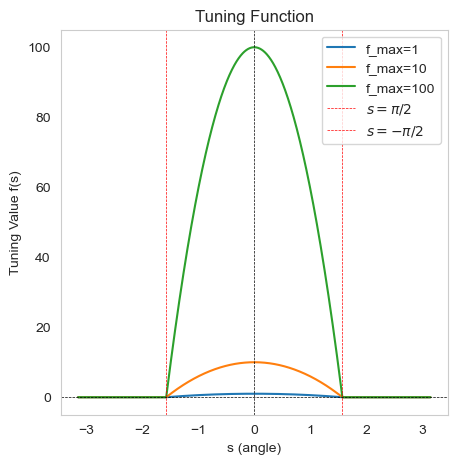

In [4]:
import numpy as np
import matplotlib.pyplot as plt

f_max_list = [1, 10, 100]
s_interval = np.linspace(-np.pi, np.pi, 1000, endpoint=True)

plt.figure(figsize=(5, 5))
for f_max in f_max_list:
    tuning_values = evaluate_tuning_function(s_interval, f_max)
    plt.plot(s_interval, tuning_values, label=f"f_max={f_max}")
    
# mark pi and -pi
plt.axvline(np.pi/2, color='red', lw=0.5, ls='--', label='$s=\pi/2$')
plt.axvline(-np.pi/2, color='red', lw=0.5, ls='--', label='$s=-\pi/2$')

plt.title("Tuning Function")
plt.xlabel("s (angle)") 
plt.ylabel("Tuning Value f(s)")
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()

In [5]:
def plot_samples(s_vals, noiseless_f, samples , title, ax=None):
    n_samples = samples.shape[1] #
    for i in range(n_samples):
        ax.plot(s_vals, samples[:, i], color='blue', alpha=0.1)

    sample_mean = np.mean(samples, axis=1)
    sample_sem = np.std(samples, axis=1, ddof=1) / np.sqrt(n_samples)
    
    ax.plot(s_vals, sample_mean, color='darkgreen', label='Mean', linewidth=2 , linestyle='dotted')
    ax.fill_between(s_vals, sample_mean - sample_sem, sample_mean + sample_sem, color='yellow', alpha=0.8, label='SEM')
    
    ax.plot(s_vals, noiseless_f, color='red', linestyle='--', label='Analytical', linewidth=2)

    
    ax.set_title(f"Noise Model: {title}")
    ax.set_xlabel("s (angle)") 
    ax.set_ylabel("r (Observed firing rate)")

# Multiplicative Additive Normal Noise: 

$$p(r|f(s)) \sim N(\mu, \sigma^2)$$
with 
    $\mu=f(s)$
    $\sigma=1$

In [6]:
"""
**(a)** 
Additive Normal Noise:

$$p(r|f(s)) \sim N(\mu, \sigma^2)$$
with 
    $\mu=f(s)$
    $\sigma=1$
"""
def sample_additive_noise(n_samples, s_vals, f_vals):
    n_points = len(s_vals)
    assert f_vals.shape == (n_points,)
    samples = scipy.stats.norm.rvs(loc=f_vals[:, None], scale=1, size=(n_points, n_samples))
    assert samples.shape == (n_points, n_samples)
    return samples

# Multiplicative Normal Noise: 

$$p(r|f(s)) \sim N(\mu, \sigma^2)$$
with 
    $\mu=f(s)$, 
    $\sigma=f(s)$

In [7]:

"""
**(b)** 
Multiplicative Normal Noise:

$$p(r|f(s)) \sim N(\mu, \sigma^2)$$
with 
    $\mu=f(s)$, 
    $\sigma=f(s)$
"""
def sample_multiplicative_noise(n_samples, s_vals, f_vals):
    n_points = len(s_vals)
    assert f_vals.shape == (n_points,)
    samples = scipy.stats.norm.rvs(loc=f_vals[:, None], 
                                   scale=f_vals[:, None], 
                                   size=(n_points, n_samples))
    assert samples.shape == (n_points, n_samples)
    return samples


# Poisson Noise

$$p(r|f(s)=\frac{f(s)^r}{r!} e^{-f(s)}$$


In [8]:
"""
**(c)**
Poisson Noise:

$$p(r|f(s)=\frac{f(s)^r}{r!} e^{-f(s)}$$
"""
def sample_poisson_noise(n_samples, s_vals, f_vals):
    n_points = len(s_vals)
    samples = scipy.stats.poisson.rvs(mu=f_vals[:, None],  
                                      size=(n_points, n_samples))
    assert samples.shape == (n_points, n_samples)
    return samples 

# Negative Binomial


$$p(r|q,p)= {{r+q-1}\choose{r}} (1-p)^q p^r$$
with :
    $p=\frac{f(s)}{f(s)+q}$, 
    $q=f(s)$.
    
Be careful about the case when $p = 0$.

In [9]:
"""
**(d)** 
Negative Binomial

$$p(r|q,p)= {{r+q-1}\choose{r}} (1-p)^q p^r$$
with :
    $p=\frac{f(s)}{f(s)+q}$, 
    $q=f(s)$.
    
Be careful about the case when $p = 0$.
"""
def sample_negative_binomial(n_samples, s_vals, f_vals):
    n_points = len(s_vals)
    q = f_vals
    
    zero_mask = f_vals == 0
    
    p = np.zeros_like(f_vals)
    p[~zero_mask] = f_vals[~zero_mask] / (f_vals[~zero_mask] + q[~zero_mask])
    
    samples = np.zeros((n_points, n_samples))
    
    if np.any(~zero_mask):
        samples[~zero_mask] = scipy.stats.nbinom.rvs(
            n=q[~zero_mask, None], 
            p=p[~zero_mask, None], 
            size=(np.sum(~zero_mask), n_samples))
    
    assert samples.shape == (n_points, n_samples)
    return samples

## Plotting Code

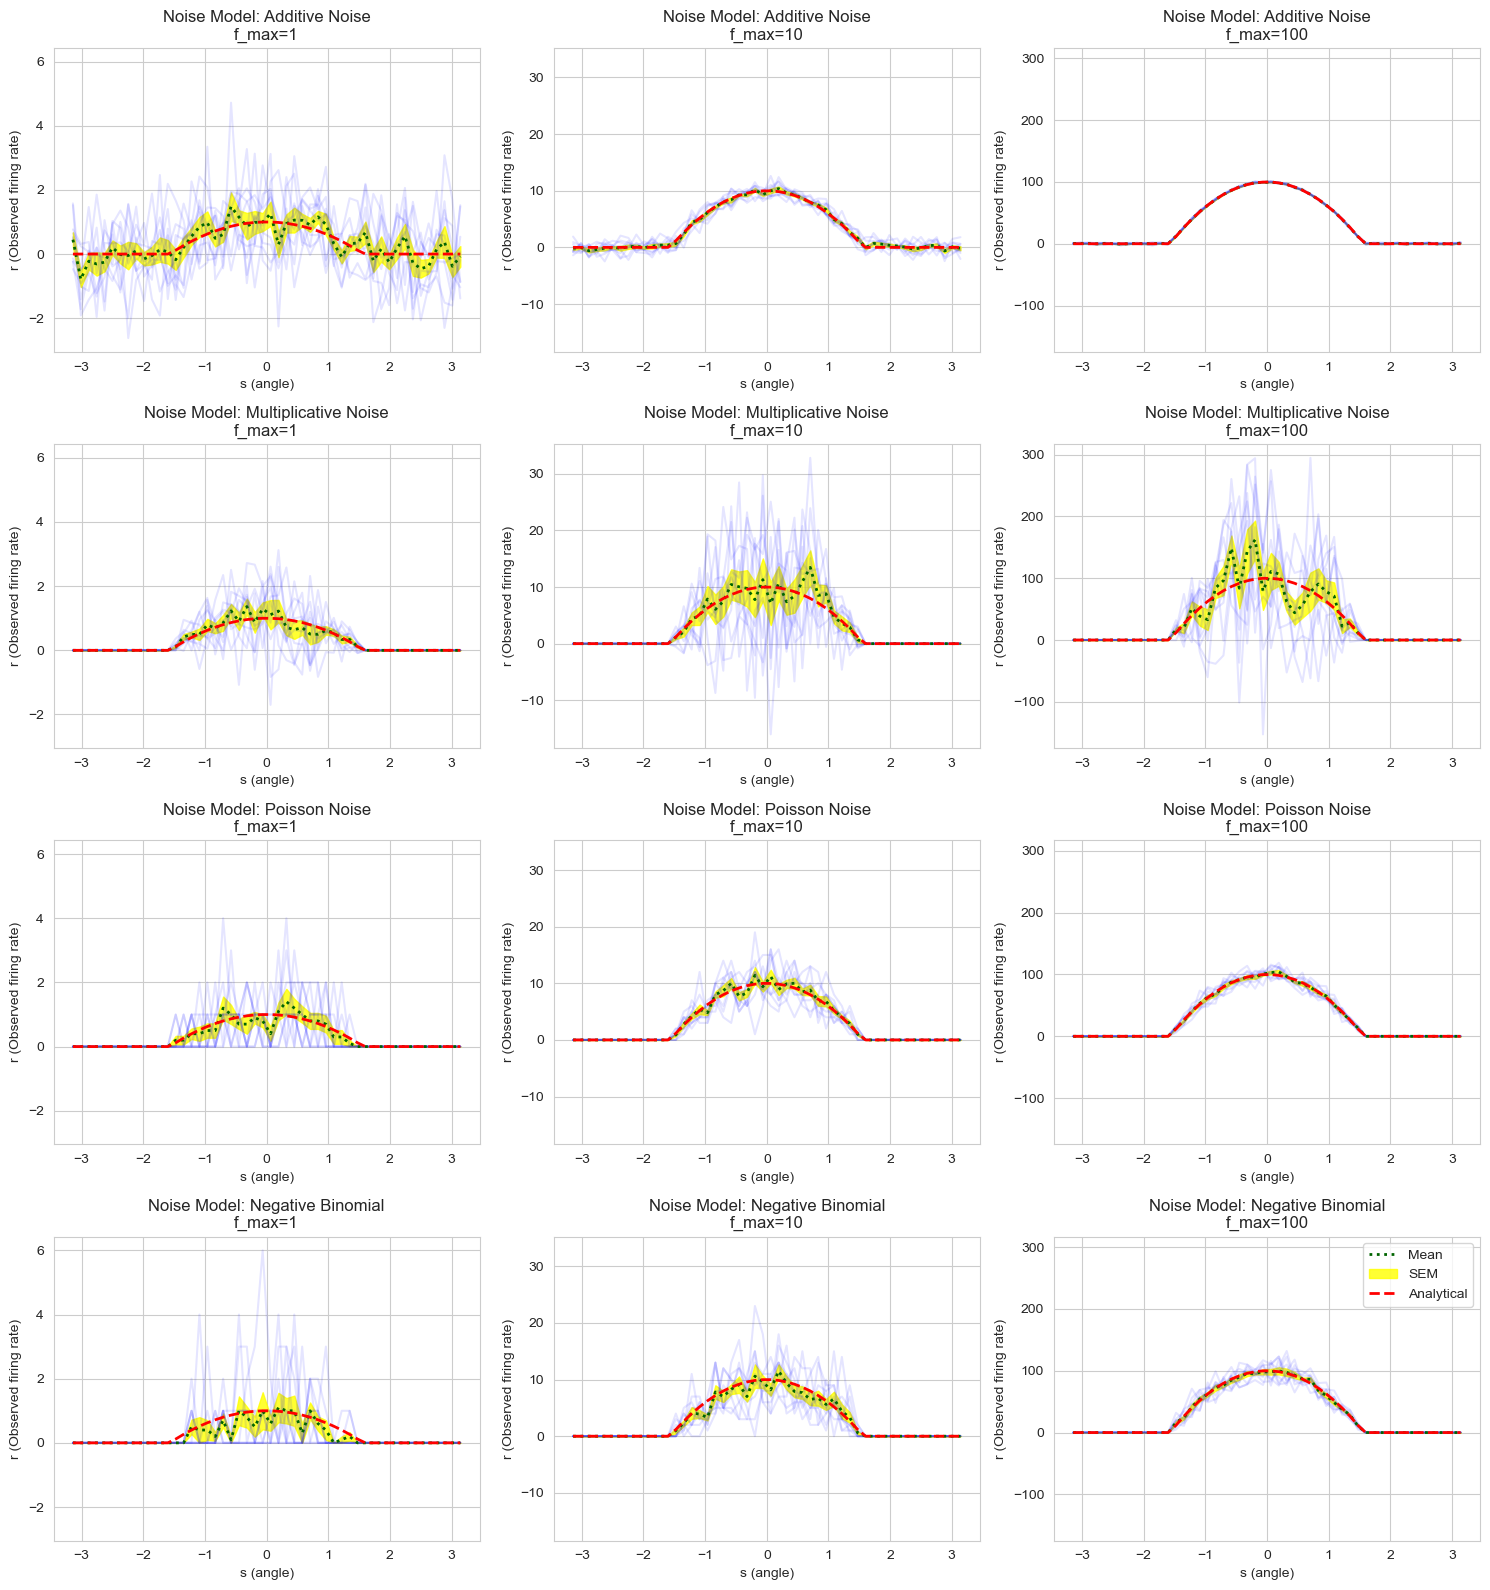

In [10]:
import numpy as np, matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns


sampling_functions = [{
    "sampling_function": sample_additive_noise, 
    "title": "Additive Noise"
}, 
{
    "sampling_function": sample_multiplicative_noise, 
    "title": "Multiplicative Noise"
},
{
    "sampling_function": sample_poisson_noise, 
    "title": "Poisson Noise"
}, 
{ 
    "sampling_function": sample_negative_binomial, 
    "title": "Negative Binomial" 
}
]

n_points=50
n_samples=10

grid_points = np.linspace(-np.pi, np.pi, n_points) 
f_max_params = [1, 10, 100  ]
num_fs = len(f_max_params)

fig, ax = plt.subplots(len(sampling_functions), len(f_max_params),
                            figsize=(5 * len(f_max_params), 4 * len(sampling_functions)),
                            sharey="col")

for idx, item in enumerate(sampling_functions): 
    sampling_func = item["sampling_function"]
    base_title = item["title"]
    ax_row = ax[idx]
    for ax_i, f_max in zip(np.atleast_1d(ax_row), f_max_params):
        firing_rate = evaluate_tuning_function(grid_points, f_max=f_max)
        noisy_firing_rate = sampling_func(n_samples, grid_points, firing_rate)
        plot_samples(grid_points, firing_rate, noisy_firing_rate,
                     f"{base_title}\nf_max={f_max}", ax_i)
plt.legend()
fig.tight_layout()
plt.show()

# **(e)** Based on your results, briefly discuss how realistic each of these models is. (1 point)


1. Additive and Multiplicative Noise Models do not make sense as they result in negative firing rate observations, which should not be possible.
2. Negative Binomial allows for greater variance thant Poisson so might be preffered for modeling neuron spiking rates which occur far from the mean firing rate.